# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [3]:
just_cities = pd.DataFrame(cities)
just_cities.head()

0
0                    lebu
1                   pisco
2  grand river south east
3                  bethel
4               ewa beach

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [8]:
test_cities=['london', 'paris', 'tokyo']

In [24]:
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
poodle = []
country = []

for city in cities:
    try:
        response=requests.get(query_url + city).json()
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        poodle.append(response['name'])
        country.append(response['sys']['country'])
        print(f"{city} found! Appending stats")
    
    except:
        print("City not found")
        pass

lebu found! Appending stats
pisco found! Appending stats
City not found
bethel found! Appending stats
ewa beach found! Appending stats
salalah found! Appending stats
mandal found! Appending stats
la ronge found! Appending stats
punta arenas found! Appending stats
puerto ayora found! Appending stats
atuona found! Appending stats
hobart found! Appending stats
City not found
santa luzia found! Appending stats
poum found! Appending stats
albanel found! Appending stats
nuuk found! Appending stats
touros found! Appending stats
shimoda found! Appending stats
busselton found! Appending stats
barrow found! Appending stats
provideniya found! Appending stats
naliya found! Appending stats
arraial do cabo found! Appending stats
terrak found! Appending stats
palmer found! Appending stats
tuktoyaktuk found! Appending stats
City not found
haines junction found! Appending stats
new norfolk found! Appending stats
ushuaia found! Appending stats
quatre cocos found! Appending stats
albany found! Appending 

puerto quijarro found! Appending stats
paciran found! Appending stats
north bend found! Appending stats
boa vista found! Appending stats
lorengau found! Appending stats
glossa found! Appending stats
hurghada found! Appending stats
caravelas found! Appending stats
asau found! Appending stats
huarmey found! Appending stats
City not found
muros found! Appending stats
constantine found! Appending stats
ostroh found! Appending stats
lakes entrance found! Appending stats
emilio carranza found! Appending stats
City not found
ryotsu found! Appending stats
City not found
avera found! Appending stats
uray found! Appending stats
brae found! Appending stats
ribeira grande found! Appending stats
bani found! Appending stats
City not found
victoria found! Appending stats
batagay-alyta found! Appending stats
pevek found! Appending stats
moreira sales found! Appending stats
tulu bolo found! Appending stats
namatanai found! Appending stats
greece found! Appending stats
pemangkat found! Appending stats
C

ust-maya found! Appending stats
yilan found! Appending stats
gladstone found! Appending stats
sao jose da coroa grande found! Appending stats
pitea found! Appending stats
iralaya found! Appending stats
City not found
saint anthony found! Appending stats
westport found! Appending stats
touho found! Appending stats
baruun-urt found! Appending stats
kamaishi found! Appending stats
City not found
sola found! Appending stats
kapustin yar found! Appending stats
tsukumi found! Appending stats
nemuro found! Appending stats
City not found
dustlik found! Appending stats
inhambane found! Appending stats
yining found! Appending stats
leh found! Appending stats
lanzhou found! Appending stats
taicheng found! Appending stats
bilma found! Appending stats
atherton found! Appending stats
san cristobal found! Appending stats
wanaka found! Appending stats
yar-sale found! Appending stats
City not found
adrar found! Appending stats
City not found
karratha found! Appending stats
krasnoselkup found! Appending

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# create a data frame from cities, lat, and temp
weather_dict = {
    'City': poodle,
    'Country': country,
    'Latitude': latitude,
    'Longitude': longitude,
    'Temperature': temperature,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

City Country  Latitude  Logitude  Temperature  Humidity  Cloudiness  \
0        Lebu      CL    -37.62    -73.65        66.79        69          48   
1       Pisco      PE    -13.70    -76.22        73.22        30          75   
2      Bethel      US     41.37    -73.41        51.17        45           1   
3  'Ewa Beach      US     21.32   -158.01        76.17        73          40   
4     Salalah      OM     17.02     54.09        73.40        64          20   

   Wind Speed  
0        7.70  
1       10.29  
2       14.99  
3        3.36  
4        3.36

In [26]:
weather_data.shape

(539, 8)

In [27]:
weather_data.count()

City           539
Country        539
Latitude       539
Logitude       539
Temperature    539
Humidity       539
Cloudiness     539
Wind Speed     539
dtype: int64

In [ ]:
weather_data.to_csv('../output_data/weather_data.csv')

In [8]:
weather_data = pd.read_csv('../output_data/weather_data.csv')
weather_data = weather_data.drop(columns={'Unnamed: 0'})
weather_data.head()

City Country  Latitude  Logitude  Temperature  Humidity  Cloudiness  \
0        Lebu      CL    -37.62    -73.65        66.79        69          48   
1       Pisco      PE    -13.70    -76.22        73.22        30          75   
2      Bethel      US     41.37    -73.41        51.17        45           1   
3  'Ewa Beach      US     21.32   -158.01        76.17        73          40   
4     Salalah      OM     17.02     54.09        73.40        64          20   

   Wind Speed  
0        7.70  
1       10.29  
2       14.99  
3        3.36  
4        3.36

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

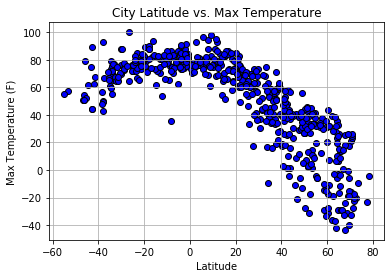

In [44]:
plt.scatter(weather_data['Latitude'], weather_data['Temperature'], c='blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

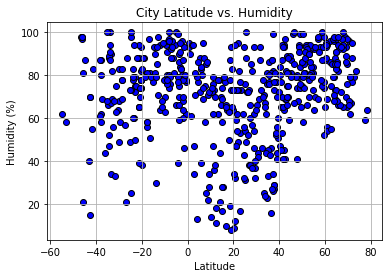

In [43]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity'], c='blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

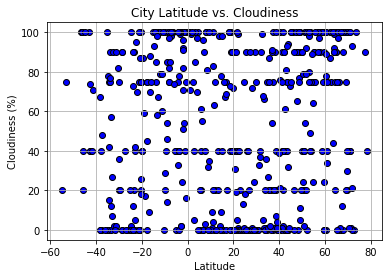

In [42]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'], c='blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

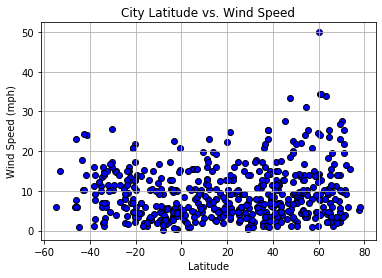

In [45]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'], c='blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.show

## Linear Regression

In [54]:
# OPTIONAL: Create a function to create Linear Regression plots
# wd_slope, wd_int, wd_r, wd_p, wd_std_err = stats.linregress(weather_data['Latitude'], weather_data[{var}])
# wd_fit = wd_slope * weather_data['Latitude'] + wd_int

# Create Northern and Southern Hemisphere DataFrames

In [ ]:
# Northern Hemisphere, >=0 degrees latitude

In [12]:
northern = weather_data.loc[(weather_data['Latitude'] >= 0),:].reset_index()
northern = northern.drop(columns={'index'})
northern.head()

City Country  Latitude  Logitude  Temperature  Humidity  Cloudiness  \
0      Bethel      US     41.37    -73.41        51.17        45           1   
1  'Ewa Beach      US     21.32   -158.01        76.17        73          40   
2     Salalah      OM     17.02     54.09        73.40        64          20   
3      Mandal      IN     25.45     74.57        53.55        49           0   
4    La Ronge      CA     55.10   -105.28        -4.00        64          75   

   Wind Speed  
0       14.99  
1        3.36  
2        3.36  
3        4.18  
4       10.29

In [ ]:
# Southern Hemisphere, <0

In [13]:
southern = weather_data.loc[(weather_data['Latitude'] < 0),:].reset_index()
southern = southern.drop(columns={'index'})
southern.head()

City Country  Latitude  Logitude  Temperature  Humidity  \
0          Lebu      CL    -37.62    -73.65        66.79        69   
1         Pisco      PE    -13.70    -76.22        73.22        30   
2  Punta Arenas      CL    -53.15    -70.92        57.67        58   
3  Puerto Ayora      EC     -0.74    -90.35        83.86        62   
4        Atuona      PF     -9.80   -139.03        80.96        78   

   Cloudiness  Wind Speed  
0          48        7.70  
1          75       10.29  
2          75       14.99  
3          75       20.80  
4          29       16.78

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8432013152015484


<function matplotlib.pyplot.show(*args, **kw)>

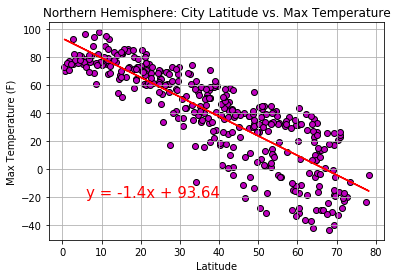

In [40]:
plt.scatter(northern['Latitude'], northern['Temperature'], c='m', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature')
plt.grid()

wd_slope, wd_int, wd_r, wd_p, wd_std_err = stats.linregress(northern['Latitude'], northern['Temperature'])
wd_fit = wd_slope * northern['Latitude'] + wd_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Latitude'], northern['Temperature'])
regress_values = northern['Latitude'] * slope + intercept
line_eq_nht = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern['Latitude'],regress_values,"r-")
plt.annotate(line_eq_nht,(6,-20),fontsize=15,color="red")

print(f"The r-squared is: {wd_r}")

plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.540966646038947


<function matplotlib.pyplot.show(*args, **kw)>

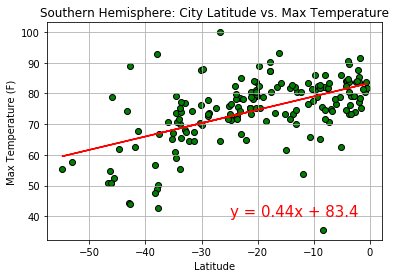

In [41]:
plt.scatter(southern['Latitude'], southern['Temperature'], c='g', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.grid()

wd_slope, wd_int, wd_r, wd_p, wd_std_err = stats.linregress(southern['Latitude'], southern['Temperature'])
wd_fit = wd_slope * southern['Latitude'] + wd_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Latitude'], southern['Temperature'])
regress_values = southern['Latitude'] * slope + intercept
line_eq_sht = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern['Latitude'],regress_values,"r-")
plt.annotate(line_eq_sht,(-25,40),fontsize=15,color="red")

print(f"The r-squared is: {wd_r}")

plt.show

In [ ]:
# Temperature Analysis 



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3891872672579907


<function matplotlib.pyplot.show(*args, **kw)>

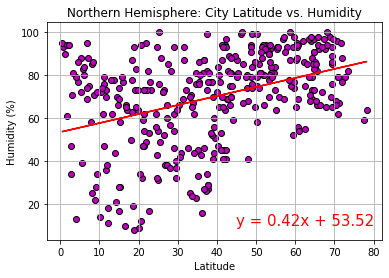

In [47]:
plt.scatter(northern['Latitude'], northern['Humidity'], c='m', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: City Latitude vs. Humidity')
plt.grid()

wd_slope, wd_int, wd_r, wd_p, wd_std_err = stats.linregress(northern['Latitude'], northern['Humidity'])
wd_fit = wd_slope * northern['Latitude'] + wd_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Latitude'], northern['Humidity'])
regress_values = northern['Latitude'] * slope + intercept
line_eq_nhh = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern['Latitude'],regress_values,"r-")
plt.annotate(line_eq_nhh,(45,10),fontsize=15,color="red")

print(f"The r-squared is: {wd_r}")

plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21856157860327063


<function matplotlib.pyplot.show(*args, **kw)>

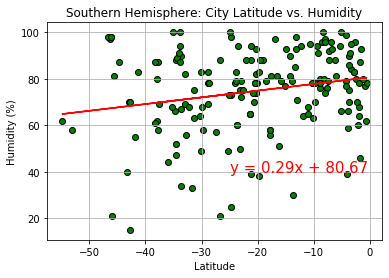

In [46]:
plt.scatter(southern['Latitude'], southern['Humidity'], c='g', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.grid()

wd_slope, wd_int, wd_r, wd_p, wd_std_err = stats.linregress(southern['Latitude'], southern['Humidity'])
wd_fit = wd_slope * southern['Latitude'] + wd_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Latitude'], southern['Humidity'])
regress_values = southern['Latitude'] * slope + intercept
line_eq_shh = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern['Latitude'],regress_values,"r-")
plt.annotate(line_eq_shh,(-25,40),fontsize=15,color="red")

print(f"The r-squared is: {wd_r}")

plt.show

In [ ]:
# Humidity Analysis



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2591218361386093


<function matplotlib.pyplot.show(*args, **kw)>

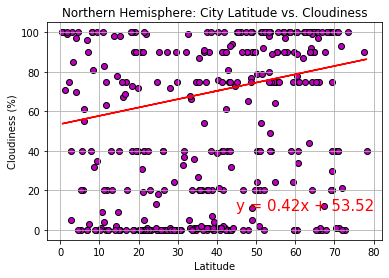

In [48]:
plt.scatter(northern['Latitude'], northern['Cloudiness'], c='m', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness')
plt.grid()

wd_slope, wd_int, wd_r, wd_p, wd_std_err = stats.linregress(northern['Latitude'], northern['Cloudiness'])
wd_fit = wd_slope * northern['Latitude'] + wd_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Latitude'], northern['Humidity'])
regress_values = northern['Latitude'] * slope + intercept
line_eq_nhc = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern['Latitude'],regress_values,"r-")
plt.annotate(line_eq_nhc,(45,10),fontsize=15,color="red")

print(f"The r-squared is: {wd_r}")

plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2327639323232673


<function matplotlib.pyplot.show(*args, **kw)>

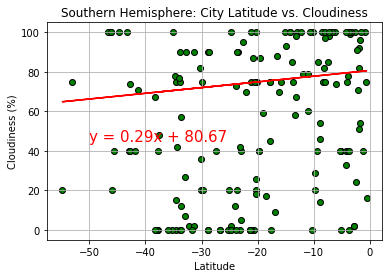

In [53]:
plt.scatter(southern['Latitude'], southern['Cloudiness'], c='g', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.grid()

wd_slope, wd_int, wd_r, wd_p, wd_std_err = stats.linregress(southern['Latitude'], southern['Cloudiness'])
wd_fit = wd_slope * southern['Latitude'] + wd_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Latitude'], southern['Humidity'])
regress_values = southern['Latitude'] * slope + intercept
line_eq_shc = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern['Latitude'],regress_values,"r-")
plt.annotate(line_eq_shc,(-50,45),fontsize=15,color="red")

print(f"The r-squared is: {wd_r}")

plt.show

In [ ]:
# Cloudiness Analysis 



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16292420933586144


<function matplotlib.pyplot.show(*args, **kw)>

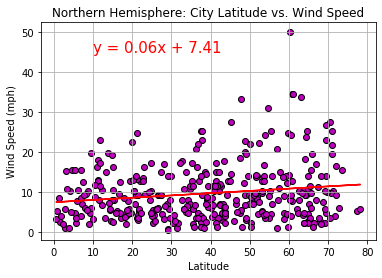

In [44]:
plt.scatter(northern['Latitude'], northern['Wind Speed'], c='m', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed')
plt.grid()

wd_slope, wd_int, wd_r, wd_p, wd_std_err = stats.linregress(northern['Latitude'], northern['Wind Speed'])
wd_fit = wd_slope * northern['Latitude'] + wd_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Latitude'], northern['Wind Speed'])
regress_values = northern['Latitude'] * slope + intercept
line_eq_nhws = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern['Latitude'],regress_values,"r-")
plt.annotate(line_eq_nhws,(10,45),fontsize=15,color="red")

print(f"The r-squared is: {wd_r}")

plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.25249181382994007


<function matplotlib.pyplot.show(*args, **kw)>

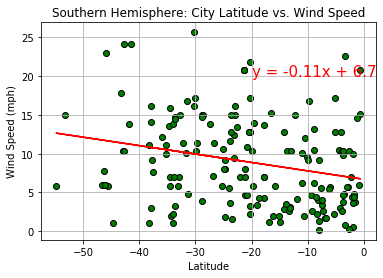

In [51]:
plt.scatter(southern['Latitude'], southern['Wind Speed'], c='g', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.grid()

wd_slope, wd_int, wd_r, wd_p, wd_std_err = stats.linregress(southern['Latitude'], southern['Wind Speed'])
wd_fit = wd_slope * southern['Latitude'] + wd_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Latitude'], southern['Wind Speed'])
regress_values = southern['Latitude'] * slope + intercept
line_eq_shws = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern['Latitude'],regress_values,"r-")
plt.annotate(line_eq_shws,(-20,20),fontsize=15,color="red")

print(f"The r-squared is: {wd_r}")

plt.show

In [ ]:
# Wind Speed Analysis

